In [3]:
pip install numpy pandas nltk scikit-learn gensim matplotlib seaborn


  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.4 MB ? eta -:--:--
    --------------------------------------- 0.5/24.4 MB 402.2 kB/s eta 0:01:00
    ------------------------------------


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

In [8]:
df = pd.read_csv(r"C:\Users\durge\Music\sentiment_anlysis_projetcs\IMDB Dataset.csv")


In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [11]:
df['review'].value_counts()

review
Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.                                                                                                                                                                                                         

In [12]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

###Text Preprocessing


In [13]:
def review_binary(sentiment):
    binary = []
    for i in sentiment:
        if i == "positive":
            binary.append(1)
        else:
            binary.append(0)
    return binary


In [14]:
df["sentiment_binary"] = review_binary(df["sentiment"])


In [15]:
df_new=df.drop('sentiment',axis=1)

In [16]:
df_new.head()

,review,sentiment_binary
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [17]:
df=df['review'].str.lower()

In [18]:
import nltk
import json
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [19]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\durge\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\durge\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\durge\AppData\Roaming\nltk_data...


True

###Remove HTML tags

In [20]:
import re

df_new['review'] = df_new['review'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))


###Remove punctation

In [21]:
import string

df_new['review']=df_new['review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

###Lower

In [22]:
df_new['review']=df_new['review'].str.lower()

In [23]:
df_new

,review,sentiment_binary
0,ne of the other reviewers has mentioned that a...,1
1,wonderful little production br br he filming ...,1
2,thought this was a wonderful way to spend tim...,1
3,asically theres a family where a little boy ak...,0
4,etter atteis ove in the ime of oney is a visua...,1
...,...,...
49995,thought this movie did a down right good job ...,1
49996,ad plot bad dialogue bad acting idiotic direct...,0
49997,am a atholic taught in parochial elementary s...,0
49998,m going to have to disagree with the previous ...,0


In [24]:
df_new['review']=df_new['review'].apply(lambda x: re.sub(r'\d+', '', x))

In [25]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\durge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\durge\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [26]:
df_new['tokens']=df_new['review'].apply(word_tokenize)

In [27]:
df_new

,review,sentiment_binary,tokens
0,ne of the other reviewers has mentioned that a...,1,"[ne, of, the, other, reviewers, has, mentioned..."
1,wonderful little production br br he filming ...,1,"[wonderful, little, production, br, br, he, fi..."
2,thought this was a wonderful way to spend tim...,1,"[thought, this, was, a, wonderful, way, to, sp..."
3,asically theres a family where a little boy ak...,0,"[asically, theres, a, family, where, a, little..."
4,etter atteis ove in the ime of oney is a visua...,1,"[etter, atteis, ove, in, the, ime, of, oney, i..."
...,...,...,...
49995,thought this movie did a down right good job ...,1,"[thought, this, movie, did, a, down, right, go..."
49996,ad plot bad dialogue bad acting idiotic direct...,0,"[ad, plot, bad, dialogue, bad, acting, idiotic..."
49997,am a atholic taught in parochial elementary s...,0,"[am, a, atholic, taught, in, parochial, elemen..."
49998,m going to have to disagree with the previous ...,0,"[m, going, to, have, to, disagree, with, the, ..."


In [28]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [29]:
df_new['cleaned_review'] = df_new['review'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)


In [30]:
df_new

,review,sentiment_binary,tokens,cleaned_review
0,ne of the other reviewers has mentioned that a...,1,"[ne, of, the, other, reviewers, has, mentioned...",ne reviewers mentioned watching z episode youl...
1,wonderful little production br br he filming ...,1,"[wonderful, little, production, br, br, he, fi...",wonderful little production br br filming tech...
2,thought this was a wonderful way to spend tim...,1,"[thought, this, was, a, wonderful, way, to, sp...",thought wonderful way spend time hot summer we...
3,asically theres a family where a little boy ak...,0,"[asically, theres, a, family, where, a, little...",asically theres family little boy ake thinks t...
4,etter atteis ove in the ime of oney is a visua...,1,"[etter, atteis, ove, in, the, ime, of, oney, i...",etter atteis ove ime oney visually stunning fi...
...,...,...,...,...
49995,thought this movie did a down right good job ...,1,"[thought, this, movie, did, a, down, right, go...",thought movie right good job wasnt creative or...
49996,ad plot bad dialogue bad acting idiotic direct...,0,"[ad, plot, bad, dialogue, bad, acting, idiotic...",ad plot bad dialogue bad acting idiotic direct...
49997,am a atholic taught in parochial elementary s...,0,"[am, a, atholic, taught, in, parochial, elemen...",atholic taught parochial elementary schools nu...
49998,m going to have to disagree with the previous ...,0,"[m, going, to, have, to, disagree, with, the, ...",going disagree previous comment side altin one...


In [31]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(lemmatized)


In [32]:
df_new['lemmatized_review'] = df_new['cleaned_review'].apply(lemmatize_text)


In [33]:
df_new

,review,sentiment_binary,tokens,cleaned_review,lemmatized_review
0,ne of the other reviewers has mentioned that a...,1,"[ne, of, the, other, reviewers, has, mentioned...",ne reviewers mentioned watching z episode youl...,ne reviewer mentioned watching z episode youll...
1,wonderful little production br br he filming ...,1,"[wonderful, little, production, br, br, he, fi...",wonderful little production br br filming tech...,wonderful little production br br filming tech...
2,thought this was a wonderful way to spend tim...,1,"[thought, this, was, a, wonderful, way, to, sp...",thought wonderful way spend time hot summer we...,thought wonderful way spend time hot summer we...
3,asically theres a family where a little boy ak...,0,"[asically, theres, a, family, where, a, little...",asically theres family little boy ake thinks t...,asically there family little boy ake think the...
4,etter atteis ove in the ime of oney is a visua...,1,"[etter, atteis, ove, in, the, ime, of, oney, i...",etter atteis ove ime oney visually stunning fi...,etter atteis ove ime oney visually stunning fi...
...,...,...,...,...,...
49995,thought this movie did a down right good job ...,1,"[thought, this, movie, did, a, down, right, go...",thought movie right good job wasnt creative or...,thought movie right good job wasnt creative or...
49996,ad plot bad dialogue bad acting idiotic direct...,0,"[ad, plot, bad, dialogue, bad, acting, idiotic...",ad plot bad dialogue bad acting idiotic direct...,ad plot bad dialogue bad acting idiotic direct...
49997,am a atholic taught in parochial elementary s...,0,"[am, a, atholic, taught, in, parochial, elemen...",atholic taught parochial elementary schools nu...,atholic taught parochial elementary school nun...
49998,m going to have to disagree with the previous ...,0,"[m, going, to, have, to, disagree, with, the, ...",going disagree previous comment side altin one...,going disagree previous comment side altin one...


In [34]:
from sklearn.model_selection import train_test_split

X = df_new['lemmatized_review']
y = df_new['sentiment_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    ngram_range=(1,2),
    max_features=5000
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

y_pred = svm_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5000
           1       0.88      0.88      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

[[4373  627]
 [ 580 4420]]


0.8793

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred = lr_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[[4399  601]
 [ 511 4489]]


0.8888

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred = nb_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      5000
           1       0.85      0.87      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

[[4210  790]
 [ 637 4363]]


0.8573

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

y_pred = rf_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      5000
           1       0.85      0.84      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

[[4253  747]
 [ 792 4208]]


0.8461

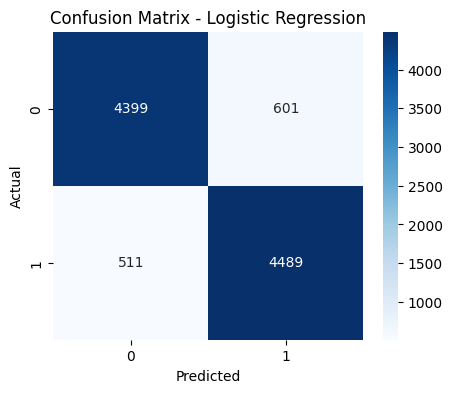

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


WORD2VEC


In [35]:
from gensim.models import Word2Vec

sentences = df_new['tokens']

w2v_model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)


In [36]:
import numpy as np

def get_average_vector(tokens, model, vector_size):
    vectors = []

    for word in tokens:
        if word in model.wv:
            vectors.append(model.wv[word])

    if len(vectors) == 0:
        return np.zeros(vector_size)

    return np.mean(vectors, axis=0)
vector_size = 100

df_new['w2v_vector'] = df_new['tokens'].apply(
    lambda x: get_average_vector(x, w2v_model, vector_size)
)


In [37]:
X_w2v = np.vstack(df_new['w2v_vector'].values)
y = df_new['sentiment_binary']


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_w2v, y, test_size=0.2, random_state=42, stratify=y
)


In [44]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


svm_model=LinearSVC()
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5000
           1       0.84      0.84      0.84      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

[[4197  803]
 [ 781 4219]]


0.8416

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)
y_predict=lr_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5000
           1       0.84      0.84      0.84      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

[[4197  803]
 [ 781 4219]]


0.8416

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      5000
           1       0.80      0.82      0.81      5000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

[[3965 1035]
 [ 918 4082]]


0.8047

In [58]:
import joblib

joblib.dump(lr_model, "tfidf_logistic.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression
import joblib

lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train_tfidf, y_train)


joblib.dump(lr_model, "models/tfidf_logistic.pkl")
joblib.dump(vectorizer, "models/tfidf_vectorizer.pkl")

['models/tfidf_vectorizer.pkl']